In [35]:
import pandas as pd
import numpy as np
import sklearn as sk
from scipy import stats
import itertools
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
#import seaborn as sbn
import warnings
#from fancyimpute import IterativeImputer
#%matplotlib inline
%matplotlib notebook

# Use titanic data to test the nearest neighbors model (nkk)

In [36]:
# Load the data
train_full = pd.read_csv('../data/train_complete.csv')

# Drop the row indices
train_full = train_full.drop(train_full.columns[0], axis=1)

# Log transform the Fare feature to be more normally distributed
train_full['Fare'] = np.log10(train_full['Fare'] + 1)

#train_full.iloc[:,:4].head()
train_full.head()

,Survived,Pclass,Fare,Age,Embarked_C,Embarked_S,Embarked_Q,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare_Title,Sex_Female
0,0.0,3.0,0.916454,22.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1.0,1.0,1.859038,38.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,1.0,3.0,0.950608,26.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,1.0,1.0,1.733197,35.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,0.0,3.0,0.956649,35.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [37]:
# Check to ensure no data are missing
train_full.isnull().sum()

Survived            0
Pclass              0
Fare                0
Age                 0
Embarked_C          0
Embarked_S          0
Embarked_Q          0
Title_Master        0
Title_Miss          0
Title_Mr            0
Title_Mrs           0
Title_Rare_Title    0
Sex_Female          0
dtype: int64

## 4 main components of a nKK model
1. Distance metric
2. K ("how many nearest neighbors to look at")
3. Weighing function on nearest neighbor
4. How to aggregate the classes of neighbor points

# nKK- k Nearest Neighbors model

<IPython.core.display.Javascript object>


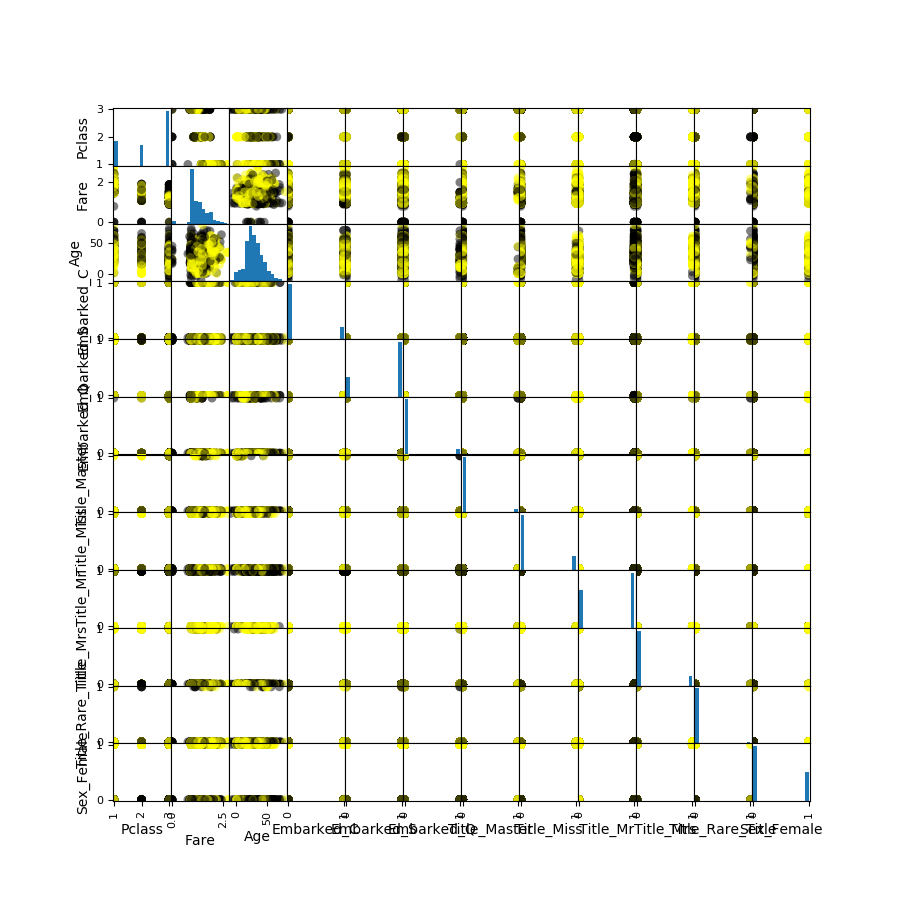

In [53]:
# Create test data and visualize features with scatter plots
from matplotlib import cm
from sklearn.model_selection import train_test_split


#X = train_full[['Pclass', 'Fare', 'Age']]
X = train_full.loc[:,'Pclass':]

y = train_full['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

cmap = cm.get_cmap('gnuplot')
scatter = pd.plotting.scatter_matrix(X_train, c= y_train, marker = 'o', s=40, hist_kwds={'bins':15}, figsize=(9,9), cmap=cmap)



In [54]:
# Create classifier object
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 15)
# Train classifier using training data
knn.fit(X_train, y_train)
# Estimate accuracy of classifier on test data
knn.score(X_test, y_test)


0.7847533632286996

       Fare   Age
0  0.916454  22.0
1  1.859038  38.0
2  0.950608  26.0
3  1.733197  35.0
4  0.956649  35.0


<IPython.core.display.Javascript object>


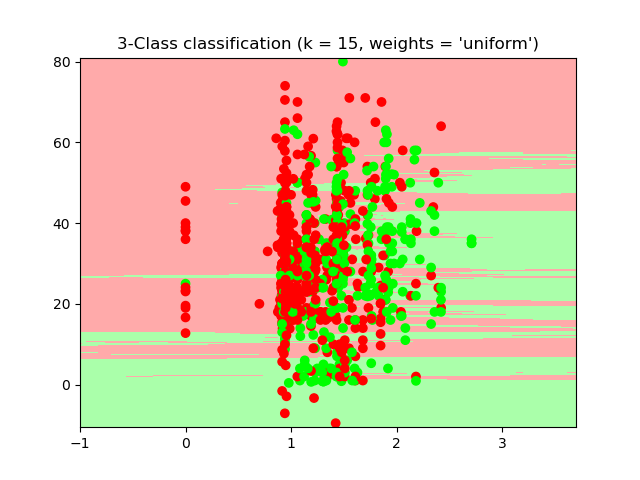

<IPython.core.display.Javascript object>


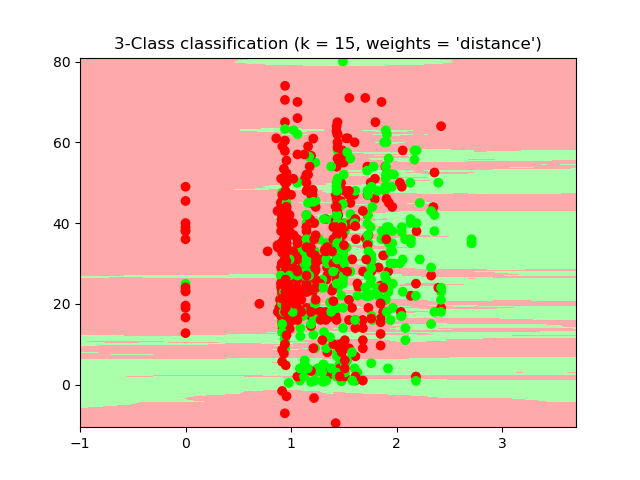

In [49]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors

print(train_full.iloc[:,2:4].head())

X = train_full.iloc[:,2:4]

n_neighbors = 15
h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00'])


for weights in ['uniform', 'distance']:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
    y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap=cmap_bold)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))

plt.show()


### How sensitive is k-NN classification accuracy to the choice of the 'k' parameter?

<IPython.core.display.Javascript object>


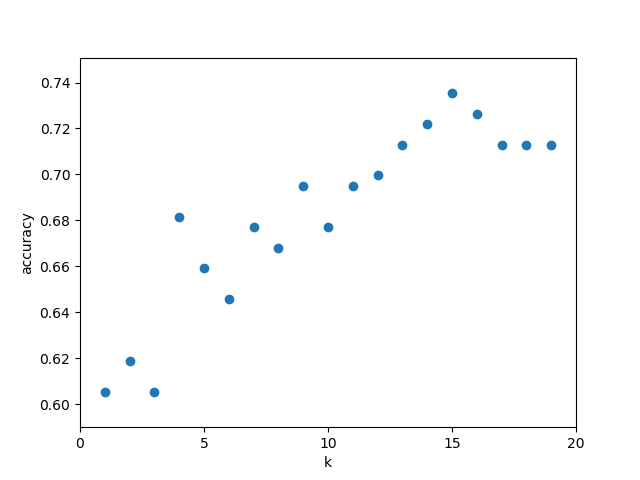

In [50]:
k_range = range(1,20)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))

plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20]);

### How sensitive is k-NN classification accuracy to the train/test split proportion?

<IPython.core.display.Javascript object>


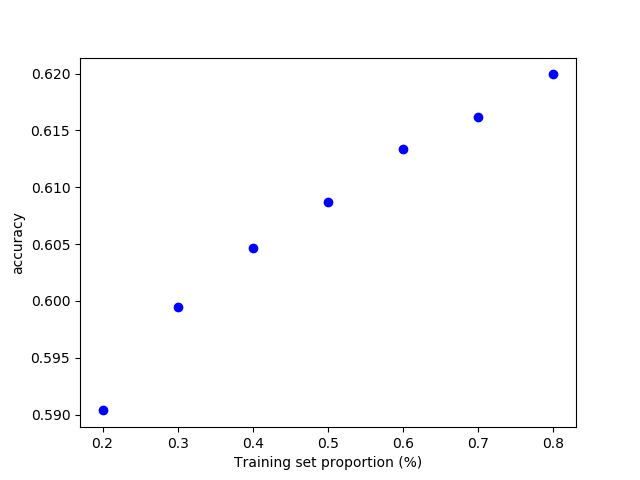

In [51]:
t = [0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2]

knn = KNeighborsClassifier(n_neighbors = 5)

plt.figure()

for s in t:

    scores = []
    for i in range(1,1000):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1-s)
        knn.fit(X_train, y_train)
        scores.append(knn.score(X_test, y_test))
    plt.plot(s, np.mean(scores), 'bo')

plt.xlabel('Training set proportion (%)')
plt.ylabel('accuracy');

In [43]:
# classify a new, made-up passenger
#test_prediction = knn.predict([[3, 1.8, 60]])
#test_prediction[0]

In [44]:
def plot_mushroom_boundary(X, y, fitted_model):

    plt.figure(figsize=(9.8,5), dpi=100)
    
    for i, plot_type in enumerate(['Decision Boundary', 'Decision Probabilities']):
        plt.subplot(1,2,i+1)

        mesh_step_size = 0.01  # step size in the mesh
        x_min, x_max = X.iloc[:, 0].min() - .1, X.iloc[:, 0].max() + .1
        y_min, y_max = X.iloc[:, 1].min() - .1, X.iloc[:, 1].max() + .1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, mesh_step_size), np.arange(y_min, y_max, mesh_step_size))
        if i == 0:
            Z = fitted_model.predict(np.c_[xx.ravel(), yy.ravel()])
        else:
            try:
                Z = fitted_model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,1]
            except:
                plt.text(0.4, 0.5, 'Probabilities Unavailable', horizontalalignment='center',
                     verticalalignment='center', transform = plt.gca().transAxes, fontsize=12)
                plt.axis('off')
                break
        Z = Z.reshape(xx.shape)
        plt.scatter(X.iloc[y.values==0,0], X.iloc[y.values==0,1], alpha=0.4, label='Edible', s=5)
        plt.scatter(X.iloc[y.values==1,0], X.iloc[y.values==1,1], alpha=0.4, label='Posionous', s=5)
        plt.imshow(Z, interpolation='nearest', cmap='RdYlBu_r', alpha=0.15, 
                   extent=(x_min, x_max, y_min, y_max), origin='lower')
        plt.title(plot_type + '\n' + 
                  str(fitted_model).split('(')[0]+ ' Test Accuracy: ' + str(np.round(fitted_model.score(X, y), 5)))
        plt.gca().set_aspect('equal');
        
    plt.tight_layout()
    plt.subplots_adjust(top=0.9, bottom=0.08, wspace=0.02)

In [45]:
model = KNeighborsClassifier(n_neighbors=15)
model.fit(X_train,y_train)

plot_mushroom_boundary(X_test, y_test, model)

<IPython.core.display.Javascript object>

# PCA plots

In [46]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2).fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(pca, y, random_state=0)


plt.figure(dpi=120)
plt.scatter(pca[y.values==0,0], pca[y.values==0,1], alpha=0.5, label='Died', s=2)
plt.scatter(pca[y.values==1,0], pca[y.values==1,1], alpha=0.5, label='Survived', s=2)
plt.legend()
plt.title('Mushroom Data Set\nFirst Two Principal Components')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.gca().set_aspect('equal')

#plt.rcParams['figure.figsize'] = [20, 10] #[width, height]

<IPython.core.display.Javascript object>

# Cross Validation
Cross-validation is a technique that uses the training data, for which we have outcome labels, to estimate the performance and bias of a classifier.  It is commonly called *k*-fold cross-validation (*k*-fold CV), since we partition the training data into *k* groups.  We then leave one of those groups out for testing data, train the model on the remaining groups, and test on the left out group to get an estimate of performance.  The performance is then averaged across all **folds** (groups).  Here is a summary:

 - Randomly split the data into *k* folds
 - For *i* in 1...*k*, leave out fold *i* for testing
 - Train the classifier on all folds except for fold *i* (the left out fold)
 - Assess performance by testing on the left out fold *i*
 - Repeat and average performance across all folds

Scikit-learn has built-in functions for creating CV folds and computing CV metrics.  An example is given below with the Perceptron neural network classifier.  Use this format on your own classifier to develop results for Week 3.

In [57]:
# Ignore warnings from sklearn (omit this if you're still experimenting with code)
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

# Import the things we need for this code block
from sklearn.model_selection import cross_val_score
# Create classifier object
from sklearn.neighbors import KNeighborsClassifier

X = train_full.loc[:,'Pclass':]
y = train_full['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

knn = KNeighborsClassifier(n_neighbors = 15)
# Train classifier using training data
knn.fit(X_train, y_train)
# Estimate accuracy of classifier on test data
knn.score(X_test, y_test)

# Fit and sore the cross-validation using 10-fold CV
scores = cross_val_score(knn, X, y, cv=10)

print('The mean and std deviation of the CV scores is {:.3f} (+/- {:.3f})'.format(np.mean(scores), np.std(scores)))

The mean and std deviation of the CV scores is 0.771 (+/- 0.045)


In [48]:
# Examine the coefficients for each feature with a single fold
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (20% of the data for testing)
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=154)

# Train and score the classifier
#classifier2 = KNeighborsClassifier(n_neighbors = 5)
#classifier2.fit(Xtrain, ytrain)
#scores2 = classifier2.score(Xtest, ytest)

n_feats = train_full.shape[1] ## 13 features

train_full.iloc[:,2:4]
print('Feature  Accuracy')
for i in range(n_feats):
    X = train_full.iloc[:, 2:i].reshape(-1, 1)
    scores = cross_val_score(knn, X, y)
    print('%d        %g' % (i, scores.mean()))

print(n_feats)
#print(classifier2.metric_params)

#print('The score of this nKK model is {:.3f}'.format(scores2))
#print(Xtrain.columns)

# Feature coefficients
#print('\n\nFeature: \tCoefficient')
#for i, colname in enumerate(Xtrain.columns):
    #print('{}:\t{:.3f}'.format(str(colname), float(classifier2.coef_[0][i])))

Feature  Accuracy


AttributeError: 'DataFrame' object has no attribute 'reshape'

## 3D plots

In [ ]:
# plotting a 3D scatter plot
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(X_train['Pclass'], X_train['Fare'], X_train['Age'], c = y_train, marker = 'o', s=100)
ax.set_xlabel('Pclass')
ax.set_ylabel('Fare')
ax.set_zlabel('Age')
plt.show()